<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Глава.-Загрузка-и-подготовка-данных" data-toc-modified-id="Глава.-Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Глава. Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-главе-1:" data-toc-modified-id="Вывод-по-главе-1:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по главе 1:</a></span></li></ul></li><li><span><a href="#Глава.-Анализ" data-toc-modified-id="Глава.-Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Глава. Анализ</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-главе-2:" data-toc-modified-id="Выводы-по-главе-2:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы по главе 2:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Стохастический-спуск-SGDRegressor" data-toc-modified-id="Стохастический-спуск-SGDRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Стохастический спуск SGDRegressor</a></span></li><li><span><a href="#Градиентный-бустинг-CatBoostRegressor" data-toc-modified-id="Градиентный-бустинг-CatBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Градиентный бустинг CatBoostRegressor</a></span></li><li><span><a href="#Градиентный-бустинг-XGBRegressor" data-toc-modified-id="Градиентный-бустинг-XGBRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Градиентный бустинг XGBRegressor</a></span></li><li><span><a href="#Выводы-по-главе-3" data-toc-modified-id="Выводы-по-главе-3-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы по главе 3</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-главе-4" data-toc-modified-id="Выводы-по-главе-4-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по главе 4</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект. Прогнозирование количества заказов такси



# Описание проекта

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания. Значение метрики RMSE на тестовой выборке должно быть не больше 48.

# Содержание проекта

- Загрузка данных и их ресемплирование по одному часу.
- Анализ данных.
- Обучение разных моделей с различными гиперпараметрами. Проверка данных на тестовой выборке.

# Библиотеки:

- Pandas
- Numpy
- Matplotlib
- SKlearn
- XGBoost
- Catboost
- LightGBM

**Путь к файлу:**
- /datasets/taxi.csv

**Инструкция по выполнению проекта**
1. Загрузите данные и выполните их ресемплирование по одному часу.
2. Проанализируйте данные.
3. Обучите разные модели с различными гиперпараметрами. Сделайте тестовую выборку размером 10% от исходных данных.
4. Проверьте данные на тестовой выборке и сделайте выводы.

**Описание данных**
Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Глава. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [2]:
#читаем данные, первый столбец - дата

df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
print(df.head())
print(df.tail())

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
                     num_orders
datetime                       
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
# Отсортируем индексы по возрастанию даты:

df.sort_index(inplace=True)


In [5]:
# проверим, в хронологическом ли порядке отсортировано

df.index.is_monotonic


True

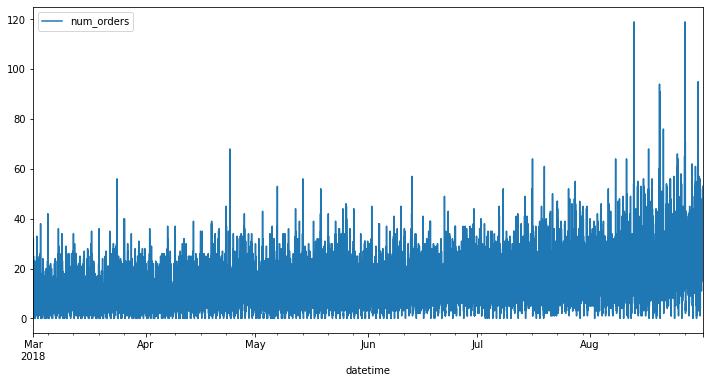

In [6]:
df.plot(figsize=(12,6));

In [7]:
df = df.resample('1H').sum()
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


Посмотрим на тренд и сезонность данных с помощью инструментов модуля <code>tsa.seasonal</code> библиотеки <code>statsmodels</code> <code>функции seasonal_decompose()</code> 

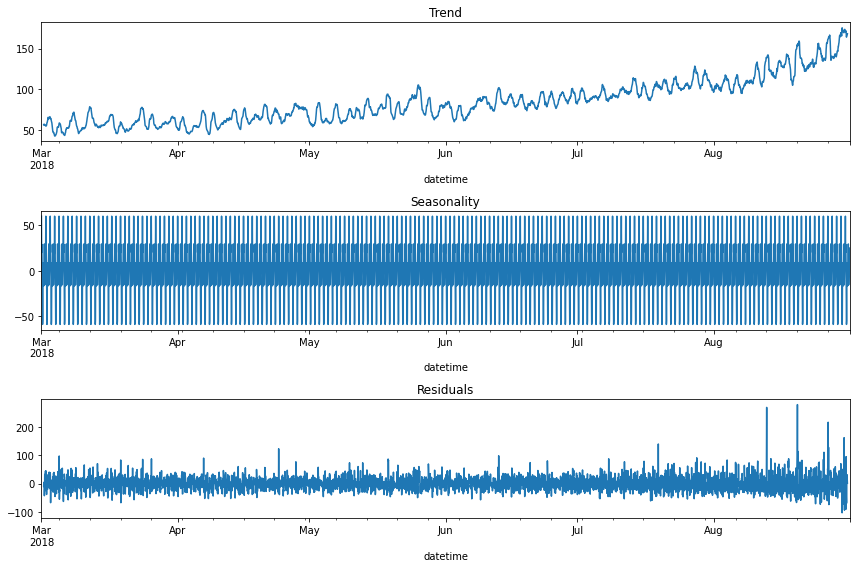

In [8]:
decomposed = seasonal_decompose(df)

plt.figure(figsize=(12, 8))
plt.subplot(311) 
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()


Перестроим график сезонности, вывелем сезонность заказа такси в течении суток

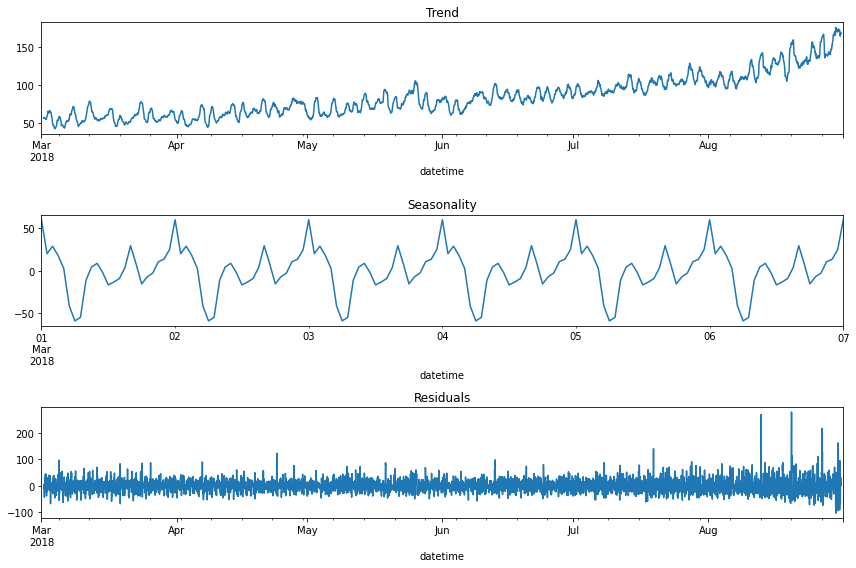

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(311) 
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal['2018-03-01 00:00:00':'2018-03-07 00:00:00'].plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

**Вывод по графикам:** 
- график тренда указывает на растущий спрос на такси, заказов становится все больше и больше, бизнес растет (по крайней мере, с марта по август)
- график сезонности свидетельствует о том, что примерно в 06:00 спрос на такси достигает минимального экстремума, к 00:00 - максимальный спрос. Также имеется локальный экстремум днем в районе обеда
- график остатка декомпозиции - шум

### Вывод по главе 1:

- Было загружены необходимые библиотеки, модули;
- Проведено ресемплирование данных в 1ч;
- Построены графки сезонности и тренда;
- Данные представляют собой нестационарный временной ряд, так как стандартное отклонение и среднее значение постоянно меняется, прогнозировать такие ряды сложнее;

## Глава. Анализ

Напишем функцию make_features(). Чтобы ряд сделать стационарным, найдём разности его значений, чтобы прибавить к таблице новых календарные признаки: месяц, день, день недели и час. Также отстающие значения с помощью функции shift(): 'lag_1', 'lag_2' — и до величины max_lag, признаки Скользящая средняя и стандартное отклонение:

In [10]:
def make_features(data, max_lag = 2, rolling_mean_size=5):
    data['difference'] = abs(data['num_orders'] - data['num_orders'].shift())
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    data['std'] = data['num_orders'].shift().rolling(rolling_mean_size).std()

    return data

make_features(df, 24, 10)

df.head(10)


,num_orders,difference,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,std
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,3,1,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,39.0,3,1,3,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,14.0,3,1,3,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,5.0,3,1,3,71.0,85.0,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,23.0,3,1,3,66.0,71.0,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 05:00:00,6,37.0,3,1,3,43.0,66.0,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 06:00:00,12,6.0,3,1,3,6.0,43.0,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 07:00:00,15,3.0,3,1,3,12.0,6.0,43.0,66.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 08:00:00,34,19.0,3,1,3,15.0,12.0,6.0,43.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Разделим датафрейм на 3 части: обучающую, вилидационную и тестовую выбороки в пропорциях 7:2:1, используя функцию train_test_split из библиетеки sklearn.model_selection и удалим пропуски в тестовой выборке, с помощью .dropna()

In [11]:
train, test = train_test_split(df, shuffle=False, test_size=0.1, random_state=123)
train, valid = train_test_split(train, shuffle=False, test_size=0.25, random_state=123)

train = train.dropna()

In [12]:
train.shape, test.shape, valid.shape

((2956, 31), (442, 31), (994, 31))

In [13]:
train_features = train.drop(['num_orders'], axis=1)
test_features = test.drop(['num_orders'], axis=1)
valid_features = valid.drop(['num_orders'], axis=1)

train_target = train['num_orders']
test_target = test['num_orders']
valid_target = valid['num_orders']


Масштабируем признаки с помощью StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit_transform(train_features)

# Заменим данные 
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)
valid_features = scaler.transform(valid_features)



Напишем функцию оценки качества моделей RMSE:

In [15]:

def RMSE(target, predict):
    RMSE = mean_squared_error(target, predict) ** 0.5
    return RMSE

### Выводы по главе 2:

В процессе анализа:

- Привели временной ряд к стационарному, используя разницу между текущим и предыдущим значениями. Такой временной ряд проще прогнозировать.
- Добавили новые признаки для обучения моделей. Это позволит моделям искать взаимосвязи в данных и лучше обучаться.

## Обучение

Обучим следующие модели для предсказания:

- линейную регресиию LinearRegression
- модель стохастического градиентного спуска SGDRegressor
- модель градиентного бустинга XGBRegressor
- модель градиентного бустинга CatBoostRegressor
- модель градиентного бустинга LGBMRegressor

Обучать модели и подибрать гиперпараметры будем на обучающей выборке, делать финальное обучение на обучающей и валидационной выборке, чтобы модель обучилась на расширенном объеме данных и смогла сделалать лучше предсказания на тестовой выборке.

Запишем объединенные выборки в переменные **train_valid_features** и **train_valid_target**:

In [16]:
train_valid_features = np.vstack((train_features, valid_features))
train_valid_target = train_target.append(valid_target)

train_valid_features.shape, train_valid_target.shape

((3950, 30), (3950,))

In [17]:
score = make_scorer(RMSE, greater_is_better=False)
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=12345)

### Линейная регрессия

In [18]:
# импорт библиотеки

from sklearn.linear_model import LinearRegression

In [19]:
# иницилизация модели

LinearReg_model = LinearRegression()
LinearReg_model

LinearRegression()

In [20]:
# обучение модели
%time
LinearReg_model.fit(train_valid_features, train_valid_target)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


LinearRegression()

Сделаем предсказания

In [21]:
%time
pred_train_valid = LinearReg_model.predict(train_valid_features)

CPU times: user 13 µs, sys: 2 µs, total: 15 µs
Wall time: 7.87 µs


In [22]:
print('RMSE на валидационной выборке LinearRegression: ', RMSE(train_valid_target, pred_train_valid).round(2))

RMSE на валидационной выборке LinearRegression:  25.56


### Стохастический спуск SGDRegressor

In [23]:
# импорт библиотеки

from sklearn.linear_model import SGDRegressor

In [24]:
# иницилизируем модель

SGDReg_model = SGDRegressor(random_state=12345)
SGDReg_model

SGDRegressor(random_state=12345)

Подберем параметры через GridSearch

In [25]:

# добавим сетку параметров
param_grid = {
    'alpha' : [0.0001, 0.001],
    'max_iter': [1e3, 1e4, 1e5],
    'eta0' : [0.1, 0.01, 0.001]
}

In [26]:
from sklearn.model_selection import TimeSeriesSplit

# иниицилизируем метод TimeSeriesSplit, основанный на кросс-валидации
tscv = TimeSeriesSplit(n_splits=3)

%time
grid_cv = GridSearchCV(SGDReg_model, 
                       param_grid, 
                       cv=tscv,  # Используем TimeSeriesSplit
                       scoring=score, 
                       verbose=10, 
                       n_jobs=-1)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.48 µs


In [27]:
#%%time
#grid_cv = GridSearchCV(SGDReg_model, param_grid, cv=cv,  scoring=score, verbose=10, n_jobs=-1)


In [28]:
%%time
grid_cv.fit(train_features, train_target)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START alpha=0.0001, eta0=0.1, max_iter=1000.0....................
[CV 1/3; 1/18] END ..alpha=0.0001, eta0=0.1, max_iter=1000.0; total time=   0.0s
[CV 2/3; 1/18] START alpha=0.0001, eta0=0.1, max_iter=1000.0....................
[CV 2/3; 1/18] END ..alpha=0.0001, eta0=0.1, max_iter=1000.0; total time=   0.0s
[CV 3/3; 1/18] START alpha=0.0001, eta0=0.1, max_iter=1000.0....................
[CV 3/3; 1/18] END ..alpha=0.0001, eta0=0.1, max_iter=1000.0; total time=   0.1s
[CV 1/3; 2/18] START alpha=0.0001, eta0=0.1, max_iter=10000.0...................
[CV 1/3; 2/18] END .alpha=0.0001, eta0=0.1, max_iter=10000.0; total time=   0.1s
[CV 2/3; 2/18] START alpha=0.0001, eta0=0.1, max_iter=10000.0...................
[CV 2/3; 2/18] END .alpha=0.0001, eta0=0.1, max_iter=10000.0; total time=   0.1s
[CV 3/3; 2/18] START alpha=0.0001, eta0=0.1, max_iter=10000.0...................
[CV 3/3; 2/18] END .alpha=0.0001, eta0=0.1, max_

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=SGDRegressor(random_state=12345), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001], 'eta0': [0.1, 0.01, 0.001],
                         'max_iter': [1000.0, 10000.0, 100000.0]},
             scoring=make_scorer(RMSE, greater_is_better=False), verbose=10)

In [29]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-28.276992887356357
{'alpha': 0.001, 'eta0': 0.1, 'max_iter': 1000.0}


In [30]:
SGDReg_model = SGDRegressor(alpha=0.001, eta0=0.01, max_iter=1000, random_state=12345, shuffle=False)


In [31]:
%%time
SGDReg_model.fit(train_valid_features, train_valid_target)

CPU times: user 380 ms, sys: 8.41 ms, total: 389 ms
Wall time: 394 ms


SGDRegressor(alpha=0.001, random_state=12345, shuffle=False)

In [32]:
%time
pred_train_valid = SGDReg_model.predict(train_valid_features)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [33]:
print('RMSE на валидационной выборке SGDRegressor: ', RMSE(train_valid_target, pred_train_valid).round(2))

RMSE на валидационной выборке SGDRegressor:  25.67


### Градиентный бустинг CatBoostRegressor

In [34]:
from catboost import CatBoostRegressor

In [35]:
# иницилизируем модель

CatBoost_model = CatBoostRegressor(random_state=12345)
CatBoost_model

In [36]:
# добавим сетку параметров

param_grid = {'max_depth': [2, 4, 6],
              'learning_rate': [0.1, 0.3, 0.5],
              'iterations': [50, 100, 200]}


In [37]:
%%time
grid_cv = GridSearchCV(CatBoost_model, 
                       param_grid, 
                       cv=tscv, 
                       scoring=score, 
                       verbose=100, 
                       n_jobs=-1)


CPU times: user 22 µs, sys: 13 µs, total: 35 µs
Wall time: 38.4 µs


In [38]:
%%time
grid_cv.fit(train_features, train_target)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3; 1/27] START iterations=50, learning_rate=0.1, max_depth=2..............
0:	learn: 28.2897702	total: 47.2ms	remaining: 2.31s
1:	learn: 27.5712106	total: 48.2ms	remaining: 1.16s
2:	learn: 26.8647034	total: 48.9ms	remaining: 766ms
3:	learn: 26.1291070	total: 49.4ms	remaining: 568ms
4:	learn: 25.3705360	total: 50ms	remaining: 450ms
5:	learn: 24.6606534	total: 50.6ms	remaining: 371ms
6:	learn: 24.1044959	total: 51.3ms	remaining: 315ms
7:	learn: 23.5915565	total: 51.9ms	remaining: 272ms
8:	learn: 23.1986874	total: 52.5ms	remaining: 239ms
9:	learn: 22.7877904	total: 53.2ms	remaining: 213ms
10:	learn: 22.4689968	total: 53.8ms	remaining: 191ms
11:	learn: 22.1159034	total: 54.3ms	remaining: 172ms
12:	learn: 21.8944238	total: 55ms	remaining: 156ms
13:	learn: 21.6802817	total: 55.5ms	remaining: 143ms
14:	learn: 21.4963528	total: 56.1ms	remaining: 131ms
15:	learn: 21.2739908	total: 56.6ms	remaining: 120ms
16:	learn: 21.1644550	to

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f3f5cba80d0>,
             n_jobs=-1,
             param_grid={'iterations': [50, 100, 200],
                         'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [2, 4, 6]},
             scoring=make_scorer(RMSE, greater_is_better=False), verbose=100)

In [39]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-19.30469242463579
{'iterations': 200, 'learning_rate': 0.1, 'max_depth': 6}


In [40]:
CatBoost_model = CatBoostRegressor(random_state=12345, max_depth = 6 , learning_rate = 0.1, iterations = 200)


In [41]:
%time
CatBoost_model.fit(train_valid_features, train_valid_target, verbose=10)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs
0:	learn: 36.8039848	total: 6.93ms	remaining: 1.38s
10:	learn: 26.0809854	total: 63.1ms	remaining: 1.08s
20:	learn: 22.3220268	total: 118ms	remaining: 1.01s
30:	learn: 20.4920166	total: 182ms	remaining: 990ms
40:	learn: 19.3956446	total: 238ms	remaining: 925ms
50:	learn: 18.8245400	total: 292ms	remaining: 854ms
60:	learn: 18.2376382	total: 348ms	remaining: 792ms
70:	learn: 17.6149509	total: 406ms	remaining: 739ms
80:	learn: 16.8466018	total: 464ms	remaining: 682ms
90:	learn: 16.3829576	total: 525ms	remaining: 629ms
100:	learn: 15.8107212	total: 583ms	remaining: 571ms
110:	learn: 15.3291671	total: 638ms	remaining: 512ms
120:	learn: 14.9601658	total: 695ms	remaining: 454ms
130:	learn: 14.6193433	total: 750ms	remaining: 395ms
140:	learn: 14.3864238	total: 805ms	remaining: 337ms
150:	learn: 14.1003886	total: 861ms	remaining: 279ms
160:	learn: 13.8456989	total: 915ms	remaining: 222ms
170:	learn: 13.6088257	total: 969ms	remainin

In [42]:
%time
pred_train_valid = CatBoost_model.predict(train_valid_features)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


In [43]:
print('RMSE на валидационной выборке CatBoost: ', RMSE(train_valid_target, pred_train_valid).round(2))

RMSE на валидационной выборке CatBoost:  12.79


### Градиентный бустинг XGBRegressor

In [44]:
from xgboost import XGBRegressor


In [45]:
XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0)
XGBRegressor_model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)

In [46]:
param_grid = {'max_depth': [2, 4, 6],
              'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.3, 0.5]}

In [47]:
%%time
for i in param_grid['max_depth']:
    for j in param_grid['n_estimators']:
        for g in param_grid['learning_rate']:
            XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0, random_state=12345, 
                                              shuffle=False, max_depth=i, n_estimators=j, learning_rate=g)
            XGBRegressor_model.fit(train_features, train_target)
            pred_valid = XGBRegressor_model.predict(valid_features)
            print('max_depth = {} , n_estimators = {}, learning_rate = {}, RMSE на валидационной выборке: {}'
                  .format(i, j, g, RMSE(valid_target, pred_valid).round(2)))

max_depth = 2 , n_estimators = 50, learning_rate = 0.1, RMSE на валидационной выборке: 33.03
max_depth = 2 , n_estimators = 50, learning_rate = 0.3, RMSE на валидационной выборке: 30.29
max_depth = 2 , n_estimators = 50, learning_rate = 0.5, RMSE на валидационной выборке: 28.91
max_depth = 2 , n_estimators = 100, learning_rate = 0.1, RMSE на валидационной выборке: 31.18
max_depth = 2 , n_estimators = 100, learning_rate = 0.3, RMSE на валидационной выборке: 28.92
max_depth = 2 , n_estimators = 100, learning_rate = 0.5, RMSE на валидационной выборке: 28.26
max_depth = 2 , n_estimators = 200, learning_rate = 0.1, RMSE на валидационной выборке: 29.96
max_depth = 2 , n_estimators = 200, learning_rate = 0.3, RMSE на валидационной выборке: 28.28
max_depth = 2 , n_estimators = 200, learning_rate = 0.5, RMSE на валидационной выборке: 28.0
max_depth = 4 , n_estimators = 50, learning_rate = 0.1, RMSE на валидационной выборке: 29.83
max_depth = 4 , n_estimators = 50, learning_rate = 0.3, RMSE на в

In [48]:
XGBRegressor_model = XGBRegressor(n_jobs=-1, verbosity=0, random_state=12345, max_depth = 4 , 
                                  n_estimators = 200, learning_rate = 0.1)

In [49]:
%%time
XGBRegressor_model.fit(train_valid_features, train_valid_target)

CPU times: user 7.59 s, sys: 38 ms, total: 7.63 s
Wall time: 7.64 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [50]:
%%time
pred_train_valid = XGBRegressor_model.predict(train_valid_features)

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 6.33 ms


In [51]:
print('RMSE на валидационной выборке XGBRegressor: ', RMSE(train_valid_target, pred_train_valid).round(2))

RMSE на валидационной выборке XGBRegressor:  11.9


### Выводы по главе 3

Было проанализировано 3 модели:

- Линейная регрессия LinearRegression: RMSE на валидационной выборке - 25.56
- Стохастическая спуск SGDRegressor: RMSE на валидационной выборке - 25.67
- Градиентный бустинг CatBoostRegressor: RMSE на валидационной выборке - 12.79
- Градиентный бустинг XGBRegressor: RMSE на валидационной выборке - 11.9

Модель CatBoost и XGBRegressor имеют заметно лучшие результаты. Проверим на тестовой выборке в следующей главе

## Тестирование

Сделаем предсказания моделей на тестовой выборке и оценим их качество:

1 - LinearRegression

In [52]:
%time
pred_test_lr = LinearReg_model.predict(test_features)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [53]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test_lr).round(2))

RMSE на тестовой выборке:  45.31


2 - SGDRegressor

In [54]:
%time
pred_test_sgd = SGDReg_model.predict(test_features)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [55]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test_sgd).round(2))

RMSE на тестовой выборке:  44.5


3 - CatBoostRegressor

In [56]:
%time
pred_test_cb = CatBoost_model.predict(test_features)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [57]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test_cb).round(2))

RMSE на тестовой выборке:  36.76


4 - XGBRegressor

In [58]:
%time
pred_test_xgbr = XGBRegressor_model.predict(test_features)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


In [59]:
print('RMSE на тестовой выборке: ', RMSE(test_target, pred_test_xgbr).round(2))

RMSE на тестовой выборке:  40.97


In [60]:
data = {'Модель':['LinearRegression', 'SGDRegressor', 'XGBRegressor', 'CatBoostRegressor'], 
        'Скорость обучения':['7.63 ms', '661 ms', '2 min 04 s', '1min 21s'],
        'Метрика RMSE': [45.31, 44.5, 40.97, 36.76]}

models_result = pd.DataFrame(data)
models_result

,Модель,Скорость обучения,Метрика RMSE
0,LinearRegression,7.63 ms,45.31
1,SGDRegressor,661 ms,44.50
2,XGBRegressor,5 min 25 s,40.97
3,CatBoostRegressor,1min 13s,36.76


### Выводы по главе 4

- Все модели показали удовлетворительный  результат по метрике RSME;
- Время ожидание самое меньшее у LinearRegression и SGDRegressor;
- Время ожидание самое большое у XGBRegressor
- CatBoostRegressor показал оптимальный результат с точки зрения времени и лучший с точки  зрения RMSE

## Общий вывод

Самая оптимальная модель для поставленной задачи - CatBoostRegressor. Модели показала rmse на уровне 36.76 и скорость обучения 1 минут 13 секунд. 